In [17]:
# Distribution Graphs

# Barplot
# We use it to visualize the categorical variables we have.

# We have a dataset called "diamond"
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
# It is important to get a first look at the dataset.
df.info()
# There are approximately 54 thousand observation units in the dataframe type, there are 10 variables in this data set,
# 3 of them are categorical and 7 of them are numerical variables, and the size it keeps in RAM is approximately 4 MB.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [22]:
df["cut"].value_counts() # cut = quality -> fair, good, very good, premium, ideal ! CATEGORICAL

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [24]:
df["color"].value_counts() # color -> from J worst to D best ! CATEGORICAL

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [25]:
# I want to make categorical variable visualization.
# But my categorical variables are ordinal, not nominal. Therefore we need to express this.
# We need to introduce the type of categorical variables into the program sequentially.
from pandas.api.types import CategoricalDtype

In [26]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [28]:
# It means convert the categorical variable in the specified dataframe. Convert type to categorical variable and sort it. So do this in an ordinal way.
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [30]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [32]:
df.cut.head(1) # You can see clearly from the output that the sorting is not as desired.

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [34]:
# How do we rearrange the order?
cut_categories = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

Text(0.5, 1.0, 'Class frequencies of the cut variable')

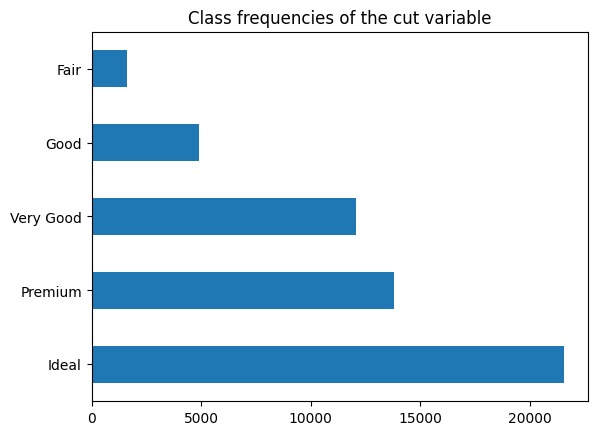

In [38]:
# We can start creating the column chart.
(df["cut"]
.value_counts()
.plot.barh()
.set_title("Class frequencies of the cut variable"))

<Axes: xlabel='cut'>

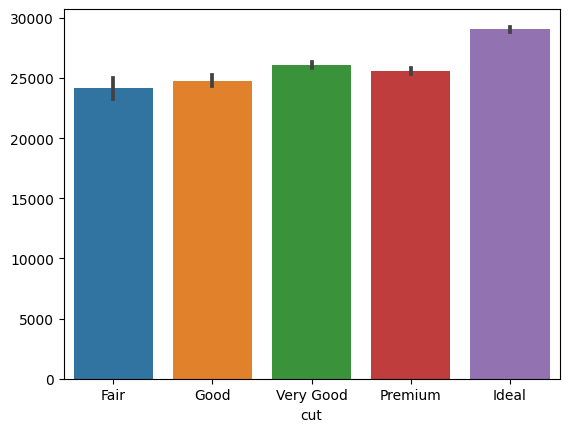

In [39]:
sns.barplot(x="cut", y=df.cut.index, data=df)

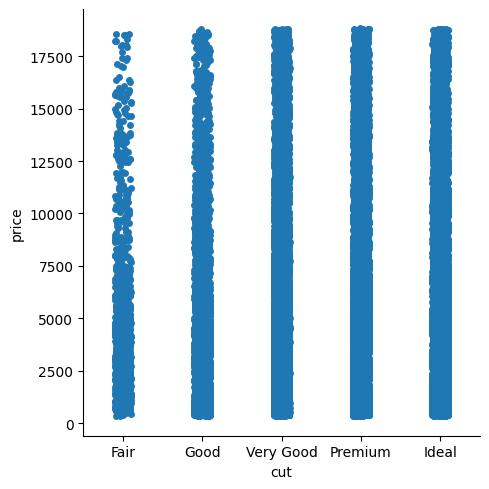

In [42]:
# crossover = evaluating the effects of the variables in the data set together
df.head()
# catplot is a function used to visualize categorical variables.
sns.catplot(x="cut", y="price", data=df)

<Axes: xlabel='cut', ylabel='price'>

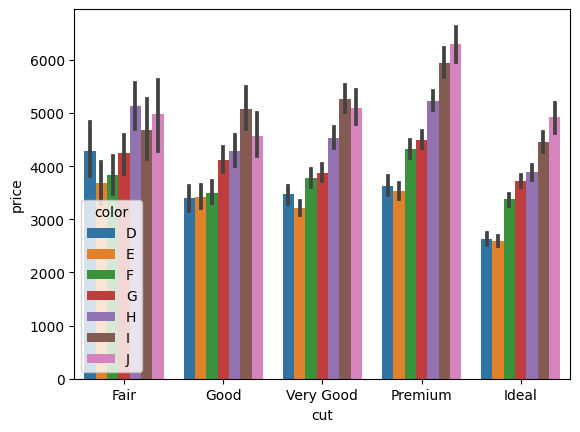

In [43]:
sns.barplot(x="cut",y="price",hue="color",data=df)

In [46]:
df.groupby(["cut","color"])["price"].mean()
# First group by cut, then group by color, and as a result, perform the average operation according to the price variable.
# When we use the barplot function and add the third dimension with the "hue" argument, although the y-axis appears to be distorted in the values ​​presented to us by the graph,
# a transformation process has actually been made to express the variability between the dimensions and is visualized accordingly.

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337